In [13]:
import pandas as pd
import tabula
import yfinance as yf

pd.set_option('display.max_columns', None)
local = r"C:\Users\jaums\Desktop\portfólio\comparação de valuations\pasta\pdf's\GGBR23.pdf"
#local1 = r"C:\Users\jaums\Desktop\portfólio\comparação de valuations\pasta\pdf's\GGBR21.pdf"
#local2 = r"C:\Users\jaums\Desktop\portfólio\comparação de valuations\pasta\pdf's\GGBR19.pdf"
#local3 = r"C:\Users\jaums\Desktop\portfólio\comparação de valuations\pasta\pdf's\GGBR17.pdf"
#local4 = r"C:\Users\jaums\Desktop\portfólio\comparação de valuations\pasta\pdf's\GGBR15.pdf"
area = [130, 82, 800, 4950] 
area_shares = [15, 30, 1000, 1010]
def processar_pdf(local, pages, area):
    dados = tabula.read_pdf(local, pages=pages, multiple_tables=True, area=area)
    df = pd.concat(dados).transpose()
    new_headers = df.iloc[0]
    df = df[1:]
    df = df.rename(columns=new_headers)
    df = df.applymap(lambda x: x.replace('.', '') if isinstance(x, str) else x)
    df = df.apply(pd.to_numeric)
    df.reset_index(inplace=True)
    df = df.rename(columns={'index':'Data'})
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
    df['Ano'] = df['Data'].dt.year
    df.drop(columns=['Data'], inplace=True)
    return df
def processar_resultado(local, pages, area):
    dados = tabula.read_pdf(local, pages=pages, multiple_tables=True, area=area)
    df = pd.concat(dados).transpose()
    new_headers = df.iloc[0]
    df = df[1:]
    df = df.rename(columns=new_headers)
    df = df.applymap(lambda x: x.replace('.', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
    df = df.apply(pd.to_numeric)
    df.reset_index(inplace=True)
    df['Ano'] = df['index'].str.extract(r'(\d{4})')
    df.drop(columns=['index'], inplace=True)
    df['Ano'] = pd.to_datetime(df['Ano'], format='%Y')
    df['Ano'] = df['Ano'].dt.year
    return df
def processar_shares (local, pages, area):
     dados = tabula.read_pdf(local, pages=pages, multiple_tables=True, area=area)
     df = pd.concat(dados).transpose().reset_index()
     df = pd.DataFrame(df['index']).iloc[4].str.replace('.','').iloc[0]
     return int(df)
#23
ativos = processar_pdf(local, "3", area)
passivos1 = processar_pdf(local, "4", area)
passivos2 = processar_pdf(local, '5', area)
resultado1 = processar_resultado(local, '6', area)
resultado2 = processar_resultado(local, '7', area)
dfpa = pd.merge(passivos1, passivos2, on='Ano')
dfr = pd.merge(resultado1 , resultado2, on='Ano')
dfrpa = pd.merge(dfpa,dfr, on='Ano')
df = pd.merge(ativos, dfrpa, on='Ano')
shares = processar_shares(local, '2', area_shares)
#Aqui é fazer as novas colunas necessárias
df['LPA'] = df['Lucro Líquido Consolidado do Período']*1000/shares
df['VPA'] = (df['Patrimônio Líquido Consolidado']-df['Intangível'])*1000/shares
df['Graham'] = (22.5*df['VPA']*df['LPA'])**(1/2)
colunas = ['Empréstimos e Financiamentos', 'Ano']
emprestimos = df[colunas].iloc[:, [2,4]]
df = pd.merge(emprestimos, df, on='Ano')
df['ROIC'] = (df['Resultado Antes do Resultado Financeiro e dos Tributos']-df['Imposto de Renda e Contribuição Social sobre o Lucro'])/(df['Patrimônio Líquido Consolidado']+df['Passivo Não Circulante'])
df

,Empréstimos e Financiamentos_x,Ano,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Tributos a Recuperar,Tributos Correntes a Recuperar,Créditos tributários,Imposto de renda/contribuição social a recuperar,Outros Ativos Circulantes,Outros_x,Dividendos a receber,Valor justo de derivativos_x,Outros ativos circulantes,Ativo mantido para venda,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Tributos Diferidos_x,Imposto de Renda e Contribuição Social Diferidos_x,Outros Ativos Não Circulantes,Créditos tributários,Depósitos Judiciais,Outros ativos não circulantes,Gastos antecipados com plano de pensão,Investimentos,Imobilizado,Imobilizado em Operação,Imobilizado,Direito de Uso em Arrendamento,Arrendamento mercantil - direito de uso de ativos,Intangível,Intangíveis,Goodwill,Passivo Total,Passivo Circulante,Obrigações Sociais e Trabalhistas,Obrigações Sociais,Salários a pagar,Fornecedores,Fornecedores Nacionais,Fornecedores mercado doméstico,Fornecedores risco sacado,Fornecedores Estrangeiros,Fornecedores importação,Obrigações Fiscais,Obrigações Fiscais Federais,Imposto de Renda e Contribuição Social a Pagar,Impostos e contribuições sociais a recolher,Empréstimos e Financiamentos_y,Empréstimos e Financiamentos_y,Debêntures,Outras Obrigações,Outros_y,Arrendamento mercantil a pagar,Beneficios a empregados,Outros passivos circulantes,Provisões,Outras Provisões_x,Provisões para Passivos Ambientais e de Desativação_x,Valor justo de derivativos_y,Passivo Não Circulante,Empréstimos e Financiamentos_y,Empréstimos e Financiamentos_y,Debêntures,Outras Obrigações,Passivos com Partes Relacionadas,Outros_y,Arrendamento mercantil a pagar,Outros passivos não circulantes,Valor justo de derivativos_y,Tributos Diferidos_y,Imposto de Renda e Contribuição Social Diferidos_y,Provisões,Provisões Fiscais Previdenciárias Trabalhistas e Cíveis,Provisões Fiscais,Provisões Previdenciárias e Trabalhistas,Provisões para Benefícios a Empregados,Provisões Cíveis,Outras Provisões_y,Provisões para Passivos Ambientais e de Desativação_y,Patrimônio Líquido Consolidado,Capital Social Realizado,Reservas de Capital,Ações em Tesouraria,Reserva de capital,Reservas de Lucros,Reserva Legal,Reserva de Incentivos Fiscais,Reserva de Investimentos e capital de giro,Ajustes de Avaliação Patrimonial,Participação dos Acionistas Não Controladores,Receita de Venda de Bens e/ou Serviços,Custo dos Bens e/ou Serviços Vendidos,Resultado Bruto,Despesas/Receitas Operacionais,Despesas com Vendas,Despesas Gerais e Administrativas,Outras Receitas Operacionais,Outras Receitas Operacionais,Outras Despesas Operacionais,Outras Despesas Operacionais,(Perdas) Reversão pela não recuperabilidade de ativos,financeiros,Resultado de Equivalência Patrimonial,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Financeiro,Receitas Financeiras,Receitas Financeiras,Atualização de créditos tributários,"Ganhos com instrumentos financeiros, líquido",Despesas Financeiras,Despesas Financeiras,"Variação cambial, líquida","Perdas com instrumentos financeiros, líquido",Resultado Antes dos Tributos sobre o Lucro,Imposto de Renda e Contribuição Social sobre o Lucro,Corrente,Diferido,Resultado Líquido das Operações Continuadas,Lucro/Prejuízo Consolidado do Período,Atribuído a Sócios da Empresa Controladora_x,Atribuído a Sócios Não Controladores_x,Lucro por Ação - (Reais / Ação),Lucro Básico por Ação,ON,PN,Lucro Diluído por Ação,ON,PN,Lucro Líquido Consolidado do Período,Outros Resultados Abrangentes,Ganhos atuariais líquidas não realizadas com plano de,pensão de benefício definido,Reclassificação para o resultado de ajustes cumulativos de,conversão para moeda estrangeira,Ajustes cumulativos de conversão para moeda estrangeira,Ganhos não realizados em hedge de investimento líquido,Ganhos (Perdas) em Hedge de fluxo de caixa,Outros resultados abrangentes de empresas controladas em,conjunto e coligadas reconh. por equivalênc,Resultado Abrangente Con

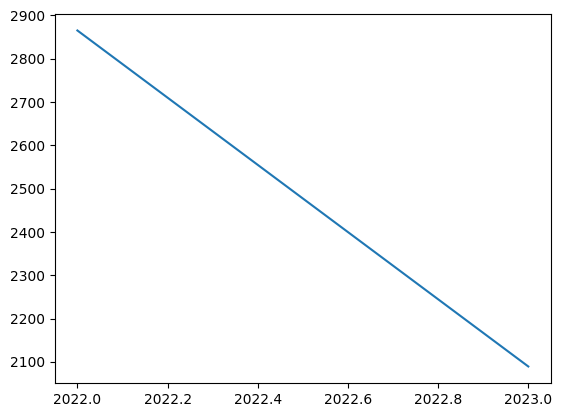

In [92]:
import matplotlib.pyplot as plt
plt.plot(df['Ano'],df['Graham'])

In [4]:
df1.columns

Index(['Ativo Total', 'Ativo Circulante', 'Caixa e Equivalentes de Caixa',
       'Aplicações Financeiras', 'Contas a Receber', 'Estoques',
       'Tributos a Recuperar', 'Tributos Correntes a Recuperar',
       'Créditos tributários',
       'Imposto de renda/contribuição social a recuperar',
       ...
       'Ajustes cumulativos de conversão para moeda estrangeira',
       'Ganhos não realizadas em hedge de investimento líquido',
       'Ganhos em Hedge de fluxo de caixa',
       'Reclassificação para o resultado de ajustes cumulativos de',
       'conversão para moeda estrangeira',
       'Outros resultados abrangentes de empresas controladas em',
       'conjunto e coligadas reconh. por equivalênc',
       'Resultado Abrangente Consolidado do Período',
       'Atribuído a Sócios da Empresa Controladora_y',
       'Atribuído a Sócios Não Controladores_y'],
      dtype='object', length=131)

In [82]:
df2

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Tributos a Recuperar,Tributos Correntes a Recuperar,Créditos tributários,Imposto de renda/contribuição social a recuperar,...,Ajustes cumulativos de conversão para moeda estrangeira,Perdas não realizados em hedge de investimento líquido,Ganhos (Perdas) em Hedge de fluxo de caixa:,Reclassificação para o resultado de ajustes cumulativos de,conversão para moeda estrangeira,Outros result. abrang. de empresas controladas em,conjuntoe coligadas reconh. por equivalência,Resultado Abrangente Consolidado do Período,Atribuído a Sócios da Empresa Controladora_y,Atribuído a Sócios Não Controladores_y
0,74612666,33428447,4162748,3392284,5414075,16861488,2903410,2903410,2083886,819524,...,1275767,-695102,1907,193334,NaN,225507,NaN,16808043,5475227,11332816
1,64764475,25038582,4617274,4495539,3737270,9169417,2332621,2332621,1201312,1131309,...,4466084,-2504914,-1972,0,NaN,358816,NaN,4649532,1725657,2923875


In [75]:
df2

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Tributos a Recuperar,Tributos Correntes a Recuperar,Créditos tributários,Imposto de renda/contribuição social a recuperar,...,Ajustes cumulativos de conversão para moeda estrangeira,Perdas não realizados em hedge de investimento líquido,Ganhos (Perdas) em Hedge de fluxo de caixa:,Reclassificação para o resultado de ajustes cumulativos de,conversão para moeda estrangeira,Outros result. abrang. de empresas controladas em,conjuntoe coligadas reconh. por equivalência,Resultado Abrangente Consolidado do Período,Atribuído a Sócios da Empresa Controladora_y,Atribuído a Sócios Não Controladores_y
0,74612666,33428447,4162748,3392284,5414075,16861488,2903410,2903410,2083886,819524,...,1275767,-695102,1907,193334,NaN,225507,NaN,16808043,5475227,11332816
1,64764475,25038582,4617274,4495539,3737270,9169417,2332621,2332621,1201312,1131309,...,4466084,-2504914,-1972,0,NaN,358816,NaN,4649532,1725657,2923875


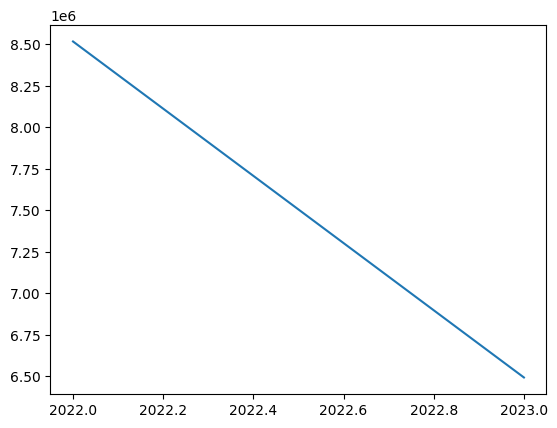

In [47]:
import matplotlib.pyplot as plt
plt.plot(resultado1['Ano'],resultado1['Receita de Venda de Bens e/ou Serviços'])